# Bayesian Multivariate Normal Mean Model

The Bayesian multivariate normal mean model treats multiple parameters as jointly uncertain through a multivariate normal prior, allowing correlated parameters to inform each other when updating on data.

# Graphical Summary

![Fig](./graphical_summary/slides/Slide27.png)

<!-- ![fig](./cartoons/Bayesian_multivariate_normal_mean_model.svg) -->

# Key Formula

In the bivariate normal mean model, if our joint uncertainty about the parameters is represented by the prior:

$$
\begin{pmatrix}
\beta_a \\
\beta_b
\end{pmatrix}
\sim \mathcal{N}
\left( 
\begin{pmatrix}
\beta_{a,0}  \\
\beta_{b,0}
\end{pmatrix},
\begin{pmatrix}
\sigma_{a,0}^2 & \rho_0 \sigma_{a,0} \sigma_{b,0} \\
\rho_0 \sigma_{a,0} \sigma_{b,0} & \sigma_{b,0}^2
\end{pmatrix}
\right)
$$

then conditioning on observed data $\text{D}$ yields the posterior distribution:

$$
\begin{pmatrix}
\beta_a \\
\beta_b
\end{pmatrix}
\bigg| \text{D} \sim \mathcal{N}
\left( 
\begin{pmatrix}
\beta_{a,1}  \\
\beta_{b,1}
\end{pmatrix},
\begin{pmatrix}
\sigma_{a,1}^2 & \rho_1 \sigma_{a,1} \sigma_{b,1} \\
\rho_1 \sigma_{a,1} \sigma_{b,1} & \sigma_{b,1}^2
\end{pmatrix}
\right)
$$

**Parameters:**
- $\beta_a, \beta_b$ = unknown mean parameters we cannot condition on
- $\text{D}$ = observed data we condition on
- Subscript $0$ = prior parameters (initial uncertainty)
- Subscript $1$ = posterior parameters (updated uncertainty after conditioning)
- $\rho_0, \rho_1$ = prior and posterior correlations quantifying how uncertainty about one parameter relates to uncertainty about the other


# Technical Details


## Special Cases of the Bivariate Model

The general framework above encompasses several things we have discussed previously as special cases:

- [**Meta-analysis assuming fixed effects**](https://statfungen.github.io/statgen-primer/meta_analysis_fixed_effect.html):

    When $\sigma_{a,0} = \sigma_{b,0} = \sigma_0$ and $\rho_0 = 1$:

    $$
    \boldsymbol{\Sigma}_0 = \begin{pmatrix}
    \sigma_0^2 & \sigma_0^2 \\
    \sigma_0^2 & \sigma_0^2
    \end{pmatrix}
    $$

    Effects are **perfectly correlated** - they move together completely.

- [**Meta-analysis assuming random effects**](https://statfungen.github.io/statgen-primer/meta_analysis_random_effect.html):

    When $\rho_0 = 0$ and $\sigma_{a,0} = \sigma_{b,0} = \sigma_0$:

    $$
    \boldsymbol{\Sigma}_0 = \begin{pmatrix}
    \sigma_0^2 & 0 \\
    0 & \sigma_0^2
    \end{pmatrix}
    $$

    Effects are **independent** with **equal prior uncertainty**.

- **Single-Trait Effects**:

    When $\sigma_{a,0} = 0$ (or $\sigma_{b,0} = 0$):

    $$
    \boldsymbol{\Sigma}_0 = \begin{pmatrix}
    0 & 0 \\
    0 & \sigma_{b,0}^2
    \end{pmatrix}
    $$

    Variant affects **only one trait** (zero uncertainty for the other means we're certain it has no effect).

## Model Setup

In the Bayesian bivariate normal mean model:

$$
\begin{pmatrix}
Y_{i,a} \\
Y_{i,b}
\end{pmatrix} \sim \mathcal{N}\left(X_i \begin{pmatrix} \beta_a \\ \beta_b \end{pmatrix}, \boldsymbol{\Sigma} \right) \quad \text{for } i = 1, 2, \ldots, N
$$

where $\boldsymbol{\beta} = \begin{pmatrix} \beta_a \\ \beta_b \end{pmatrix}$ represents joint uncertainty about both parameters, and $\boldsymbol{\Sigma}$ is the known covariance matrix.

## Prior Distribution

$$
\boldsymbol{\beta} \sim \mathcal{N}(\boldsymbol{\beta}_0, \boldsymbol{\Sigma}_0)
$$

where $\boldsymbol{\Sigma}_0$ quantifies uncertainty about each parameter and how these uncertainties are correlated.


## Likelihood

$$
p(\mathbf{Y}|\boldsymbol{\beta}) \propto \exp\left(-\frac{1}{2} \sum_{i=1}^N (\mathbf{Y}_i - X_i\boldsymbol{\beta})^T \boldsymbol{\Sigma}^{-1} (\mathbf{Y}_i - X_i\boldsymbol{\beta})\right)
$$

where $\mathbf{Y}_i = \begin{pmatrix} Y_{i,a} \\ Y_{i,b} \end{pmatrix}$.


## Posterior Distribution

$$
p(\boldsymbol{\beta}|\mathbf{Y}) \propto p(\mathbf{Y}|\boldsymbol{\beta}) p(\boldsymbol{\beta})
$$

The posterior is:

$$
\boldsymbol{\beta} \mid \mathbf{Y} \sim \mathcal{N}\left( \boldsymbol{\beta}_1, \boldsymbol{\Sigma}_1 \right)
$$

where:

$$
\boldsymbol{\Sigma}_1^{-1} = \boldsymbol{\Sigma}_0^{-1} + T_1 \boldsymbol{\Sigma}^{-1}, \quad \boldsymbol{\beta}_1 = \boldsymbol{\Sigma}_1 \left( \boldsymbol{\Sigma}_0^{-1} \boldsymbol{\beta}_0 + \boldsymbol{\Sigma}^{-1} \mathbf{T}_2 \right)
$$

with sufficient statistics:

$$
T_1 = \sum_{i=1}^N X_i^2, \quad \mathbf{T}_2 = \sum_{i=1}^N X_i \mathbf{Y}_i = \begin{pmatrix} \sum_{i=1}^N X_i Y_{i,a} \\ \sum_{i=1}^N X_i Y_{i,b} \end{pmatrix}
$$

### Posterior as Weighted Combination

$$
\boldsymbol{\beta}_1 = \boldsymbol{W} \cdot \frac{\mathbf{T}_2}{T_1} + (\boldsymbol{I} - \boldsymbol{W}) \cdot \boldsymbol{\beta}_0
$$

where $\boldsymbol{W}$ balances prior beliefs and observed data based on their relative information content.


## Extension to $p$ Dimensions

The bivariate formulation extends naturally to the general $p$-dimensional multivariate case by replacing:
- $2 \times 2$ matrices with $p \times p$ matrices
- Bivariate normal distributions with $p$-variate normal distributions  
- All matrix operations remain the same

**The fundamental principle remains**: We systematically handle joint uncertainty about multiple parameters we cannot condition on, then update this uncertainty by conditioning on observed data, allowing information about one parameter to reduce uncertainty about others through their correlation structure.

# Related Topics

- [ordinary least squares](https://statfungen.github.io/statgen-primer/ordinary_least_squares.html)
- [summary statistics](https://statfungen.github.io/statgen-primer/summary_statistics.html)
- [likelihood](https://statfungen.github.io/statgen-primer/likelihood.html)
- [random effect](https://statfungen.github.io/statgen-primer/random_effect.html)
- [maximum likelihood estimation](https://statfungen.github.io/statgen-primer/maximum_likelihood_estimation.html)
- [Bayesian normal mean model](https://statfungen.github.io/statgen-primer/Bayesian_normal_mean_model.html#)

# Example

In the [Lecture: Bayesian normal mean model](https://statfungen.github.io/statgen-primer/Bayesian_normal_mean_model.html#), we analyzed genetic effects on a single trait. Now we extend this to **multiple correlated traits** - specifically, we analyze how a genetic variant affects both height and weight simultaneously.

**Why analyze traits jointly?**
- A variant may affect multiple traits with correlated effects
- Traits themselves are often correlated (e.g., height and weight)
- Joint analysis allows information about one effect to inform our uncertainty about the other

**Model**:

$$
\begin{align}
\begin{pmatrix} Y_{i,a} \\ Y_{i,b} \end{pmatrix} \bigg| \boldsymbol{\beta}, \boldsymbol{\Sigma} &\sim \mathcal{N}\left(X_i \boldsymbol{\beta}, \boldsymbol{\Sigma} \right) \quad \text{[likelihood]} \\
\boldsymbol{\beta} | \boldsymbol{\Sigma}_0 &\sim \mathcal{N}(\boldsymbol{\beta}_0, \boldsymbol{\Sigma}_0) \quad \text{[prior]} \\
\boldsymbol{\Sigma}, \boldsymbol{\Sigma}_0 & \text{ estimated from data} \quad \text{[hyperparameters]}
\end{align}
$$

where $\boldsymbol{\beta} = \begin{pmatrix} \beta_a \\ \beta_b \end{pmatrix}$ represents the joint effects on traits a (height) and b (weight).

## Setup

We use the same genotype data from the [Lecture: Bayesian normal mean model](https://statfungen.github.io/statgen-primer/Bayesian_normal_mean_model.html#), but now generate two correlated traits (height and weight) for each individual.

In [1]:
# Clear the environment
rm(list = ls())
library(MASS)
library(mvtnorm)  # For dmvnorm
library(ggplot2)
library(ellipse)
set.seed(19)  # For reproducibility

# Generate genotype data for 5 individuals at a single variant
N <- 5
genotypes <- c("CC", "CT", "TT", "CT", "CC")  # Individual genotypes
names(genotypes) <- paste("Individual", 1:N)

# Define alternative allele
alt_allele <- "T"

# Convert to additive genotype coding (count of alternative alleles)
Xraw_additive <- numeric(N)
for (i in 1:N) {
  alleles <- strsplit(genotypes[i], "")[[1]]
  Xraw_additive[i] <- sum(alleles == alt_allele)
}
names(Xraw_additive) <- names(genotypes)

# Standardize genotypes
X <- scale(Xraw_additive, center = TRUE, scale = TRUE)[,1]


Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs




In [2]:
# Set true effects and residual covariance for data generation
true_beta <- c(0.3, 0.4)  # [height_effect, weight_effect]
true_Sigma <- matrix(c(1.0, 0.6,   # height variance = 1, covariance = 0.6
                       0.6, 1.2),  # weight variance = 1.2
                     nrow = 2)

# Generate correlated phenotypes for height and weight
Y <- matrix(0, nrow = N, ncol = 2)
for(i in 1:N) {
  genetic_effects <- X[i] * true_beta
  Y[i, ] <- mvrnorm(1, mu = genetic_effects, Sigma = true_Sigma)
}
colnames(Y) <- c("Height", "Weight")
rownames(Y) <- paste("Individual", 1:N)

To apply the Bayesian multivariate normal mean model, we need to specify the **prior distribution** for the effect vector $\boldsymbol{\beta}$ and estimate the covariance matrices. We assume the prior mean is zero (no prior expectation about effects):

$$
\boldsymbol{\beta} \sim \mathcal{N}(\boldsymbol{\beta}_0, \boldsymbol{\Sigma}_0) \quad \text{where } \boldsymbol{\beta}_0 = \begin{pmatrix} 0 \\ 0 \end{pmatrix}
$$

The **prior covariance** $\boldsymbol{\Sigma}_0$ quantifies our joint uncertainty about both effects, and the **residual covariance** $\boldsymbol{\Sigma}$ captures the correlation between traits. We will estimate both from the data using maximum likelihood.

## Prior Distribution

In [3]:
# Define prior distribution
# Prior mean: no prior expectation about effects on either trait
beta_0 <- c(0, 0)
names(beta_0) <- c("Height", "Weight")

## Estimating the Covariance Matrices

**Why estimate covariances?** We need $\boldsymbol{\Sigma}$ and $\boldsymbol{\Sigma}_0$ to compute the posterior, but we don't know their true values. 

With only 5 observations, estimating all parameters of two 2×2 covariance matrices is challenging. For this pedagogical example, we'll use a **simplified approach**: estimate the residual covariance from the sample data and use a sensible prior covariance structure.

In [4]:
# Estimate residual covariance from sample
# Use sample covariance as estimate for Sigma
Sigma_mle <- cov(Y)
rownames(Sigma_mle) <- colnames(Sigma_mle) <- c("Height", "Weight")

cat("Estimated residual covariance (Sigma):\n")
round(Sigma_mle, 3)

# For the prior covariance, use a modest assumption:
# - Moderate uncertainty (variances around 0.2-0.3)
# - Some correlation between effects (traits often have correlated genetic effects)
Sigma_0_mle <- matrix(c(0.25, 0.10,
                        0.10, 0.25), nrow = 2)
rownames(Sigma_0_mle) <- colnames(Sigma_0_mle) <- c("Height", "Weight")

cat("\nPrior covariance (Sigma_0):\n")
round(Sigma_0_mle, 3)

Estimated residual covariance (Sigma):


,Height,Weight
Height,0.705,0.547
Weight,0.547,0.742



Prior covariance (Sigma_0):


,Height,Weight
Height,0.25,0.10
Weight,0.10,0.25


## Posterior Distribution

With the estimated covariance matrices, we can now compute the posterior distribution using the formulas from the Technical Details section.

In [5]:
# Calculate sufficient statistics
T1 <- sum(X^2)
T2 <- colSums(X * Y)  # Vector of cross-products

cat("Sufficient statistics from data:\n")
cat("T1 (sum of X^2):", round(T1, 4), "\n")
cat(paste0("T2 (sum of X*Y):"), round(T2, 4))

Sufficient statistics from data:
T1 (sum of X^2): 4 
T2 (sum of X*Y): 2.9829 2.0888

In [6]:
# Posterior computation using estimated covariances and prior mean beta_0
Sigma_inv <- solve(Sigma_mle)
Sigma_0_inv <- solve(Sigma_0_mle)

# Posterior covariance (uncertainty always decreases)
Sigma_1_inv <- T1 * Sigma_inv + Sigma_0_inv
Sigma_1 <- solve(Sigma_1_inv)

# Posterior mean (weighted combination of prior and data)
beta_1 <- Sigma_1 %*% (T1 * Sigma_inv %*% (T2/T1) + Sigma_0_inv %*% beta_0)

rownames(Sigma_1) <- colnames(Sigma_1) <- c("Height", "Weight")
rownames(beta_1) <- c("Height", "Weight")

cat("\nPosterior Results:\n")
cat("Posterior mean vector (beta_1):\n")
round(beta_1, 4)
cat("\nPosterior covariance matrix (Sigma_1):\n")
round(Sigma_1, 4)

cat("\nUncertainty reduction:\n")
cat("Prior marginal variances:", round(diag(Sigma_0_mle), 4), "\n")
cat("Posterior marginal variances:", round(diag(Sigma_1), 4), "\n")


Posterior Results:
Posterior mean vector (beta_1):


Height,0.4236
Weight,0.2439



Posterior covariance matrix (Sigma_1):


,Height,Weight
Height,0.0984,0.0662
Weight,0.0662,0.1021



Uncertainty reduction:
Prior marginal variances: 0.25 0.25 
Posterior marginal variances: 0.0984 0.1021 


## Visualizing the Bayesian Update

Let's visualize how observing data updates our joint beliefs about both effects. We'll show the prior and posterior distributions as contour ellipses in the two-dimensional parameter space.

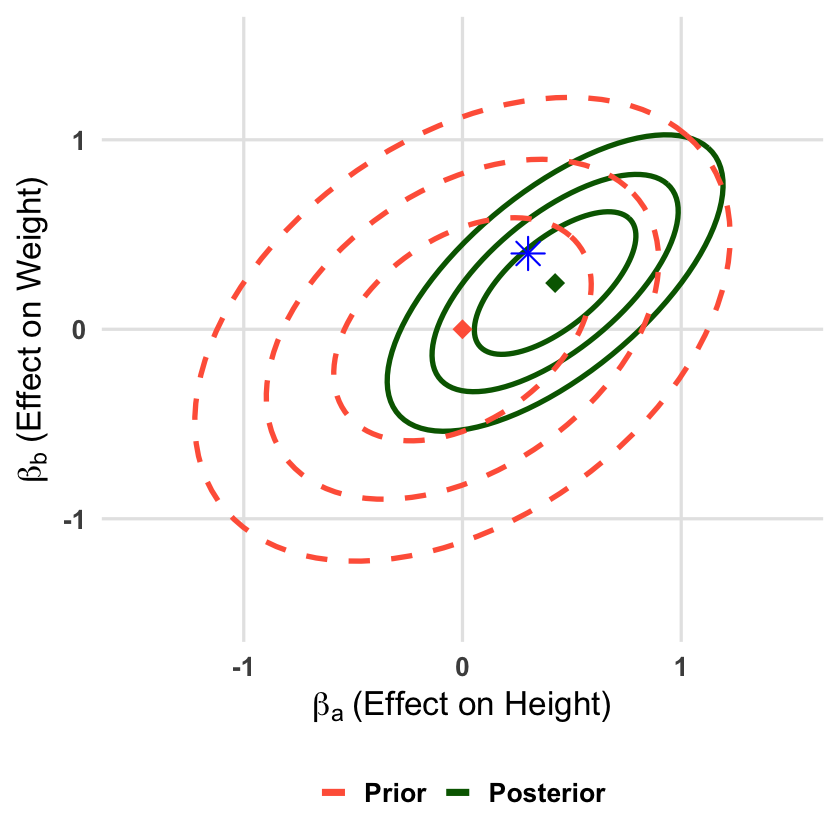

In [11]:
# Create visualization of prior and posterior distributions

# Set plot limits
xlim <- c(-1.5, 1.5)  # Height effect range
ylim <- c(-1.5, 1.5)  # Weight effect range

# Create contour levels for confidence ellipses
contour_levels <- c(0.5, 0.8, 0.95)
ellipse_data <- data.frame()

for(i in 1:length(contour_levels)) {
  # Prior ellipse
  prior_ellipse <- ellipse(Sigma_0_mle, centre = beta_0, level = contour_levels[i])
  prior_df <- data.frame(x = prior_ellipse[,1], y = prior_ellipse[,2], 
                        level = contour_levels[i], type = "Prior",
                        group = paste("Prior", i))
  
  # Posterior ellipse
  post_ellipse <- ellipse(Sigma_1, centre = as.vector(beta_1), level = contour_levels[i])
  post_df <- data.frame(x = post_ellipse[,1], y = post_ellipse[,2], 
                       level = contour_levels[i], type = "Posterior",
                       group = paste("Posterior", i))
  
  ellipse_data <- rbind(ellipse_data, prior_df, post_df)
}

# Create the plot
p <- ggplot() +
  # Contour ellipses
  geom_path(data = ellipse_data, 
            aes(x = x, y = y, color = type, linetype = type, group = group), 
            linewidth = 1.5) +
  
  # Mean points
  geom_point(data = data.frame(x = beta_0[1], y = beta_0[2]), 
             aes(x = x, y = y), color = "tomato", size = 5, shape = 18) +
  geom_point(data = data.frame(x = beta_1[1], y = beta_1[2]), 
             aes(x = x, y = y), color = "darkgreen", size = 5, shape = 18) +  

  # True effect point
  geom_point(data = data.frame(x = true_beta[1], y = true_beta[2]), 
             aes(x = x, y = y), color = "blue", size = 6, shape = 8) + # shape 8 is a star
  
  # Scales and labels
  scale_color_manual(
    values = c("Prior" = "tomato", "Posterior" = "darkgreen"),
    breaks = c("Prior", "Posterior")
  ) +
  scale_linetype_manual(
    values = c("Prior" = "dashed", "Posterior" = "solid"),
    breaks = c("Prior", "Posterior")
  ) +
  labs(x = expression(beta[a]~"(Effect on Height)"), 
       y = expression(beta[b]~"(Effect on Weight)")) +
  xlim(xlim) + ylim(ylim) +
  # Theme
  theme_minimal(base_size = 20) +
  theme(
    axis.title = element_text(face = "bold"),
    axis.text = element_text(face = "bold"),
    legend.title = element_blank(),
    legend.text = element_text(face = "bold"),
    legend.position = "bottom",
    panel.background = element_rect(fill = "transparent", color = NA),
    plot.background = element_rect(fill = "transparent", color = NA),
    panel.grid.major = element_line(color = "gray90"),
    panel.grid.minor = element_blank()
  ) +
  guides(color = guide_legend(override.aes = list(linewidth = 2)))

# Display plot
print(p)

In [12]:
ggsave("./figures/Bayesian_multivariate_normal_mean_model.png", plot = p,
       width = 8, height = 8, dpi = 300, bg = "transparent")